# Cyclistic Bike-Sharing Analysis

**Alfikri Ramadhan - [LinkedIn](https://www.linkedin.com/in/alfikri-ramadhan/)**

<p align="center">
  <img src="fig/cyclistic_cover.jpg" width="250" height="250" />

## Introduction
***

### The Cyclistic Company

Cyclistic is a bike-sharing company in Chicago, United States that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. Cyclistic users are more likely to ride for leisure, but the users also use them to commute to work each day.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Although the pricing flexibility helps Cyclistic attract more customers, Cyclistic believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Cyclistic believes there is a very good chance to convert casual riders into members.

### Problem Statement

Convert casual riders into Cyclistic members.

### Business Task

- Analyze how casual riders and annual members behaves differently.
- Support stakeholder to make data-driven decision-making to create campaign or strategies that attempt to convert casual riders into Cyclistic members.

## The Dataset
---

We will use Cyclistic's historical trip data to analyze and identify trends. The dataset can be downloaded [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).

The dataset we use covers 1 year of observation, from October 2021 to September 2022.

| Columns | Description |
| :- | :- |
| ride_id | id for this ride |
| rideable_type | type of bike being ride |
| started_at | date and time the bike is started to use |
| ended_at | date and time the bike is finished to use |
| start_station_name | name of the ride starting station |
| start_station_id | id of the ride starting station |
| end_station_name | name of the ride ending station |
| end_station_id | id of the ride ending station |
| start_lat | latitude coordinate of the ride starting station |
| start_lng | longitude coordinate of the ride starting station |
| end_lat | latitude coordinate of the ride ending station |
| end_lng | longitude coordinate of the ride ending station |
| member_casual | membership type; `casual` for casual rider or `member` for annual membership rider |

## Import Library
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import datetime
import calendar

import glob

import warnings
warnings.filterwarnings("ignore")

## Load the Data
---

Import and combine all dataset using `glob`

In [2]:
trip_files = glob.glob("divvy_trip_dataset/202***-divvy-tripdata.csv")
df_list = []
for filename in trip_files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list).reset_index()
df = df.drop(['index'], axis=1)

## Data Overview
---

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [5]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 5828235


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828235 entries, 0 to 5828234
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 578.1+ MB


### Check for Missing Values

In [7]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    895032
start_station_id      895032
end_station_name      958227
end_station_id        958227
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
dtype: int64

In [8]:
percent_null = df.isnull().sum() * 100 / len(df)

In [9]:
print(round(percent_null, 2))

ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    15.36
start_station_id      15.36
end_station_name      16.44
end_station_id        16.44
start_lat              0.00
start_lng              0.00
end_lat                0.10
end_lng                0.10
member_casual          0.00
dtype: float64


The column `start_station_name`, `start_station_id`, `end_station_name`, and `end_station_id` have quite many missing values, which is over 15%. There are also some missing values in `end_lat` and `end_lng`, though it is much smaller at 0.1%.

### Handle Missing Values

In [10]:
df_raw = df.copy()

While the percentage of missing values in station columns are moderately high, we will drop these columns since we won't be using them in our analysis.

In [11]:
drop_col = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']
df = df.drop(drop_col, axis=1)

In [12]:
# fill missing data with mode
df['end_lat'].fillna(df['end_lat'].mode()[0], inplace=True)
df['end_lng'].fillna(df['end_lng'].mode()[0], inplace=True)

In [13]:
percent_null_new = df.isnull().sum() * 100 / len(df)

In [14]:
print(round(percent_null_new, 2))

ride_id          0.0
rideable_type    0.0
started_at       0.0
ended_at         0.0
start_lat        0.0
start_lng        0.0
end_lat          0.0
end_lng          0.0
member_casual    0.0
dtype: float64


### Check Duplicated Values

In [15]:
df.duplicated().value_counts()

False    5828235
dtype: int64

There is no duplicated value in our dataset

### Statistical Summary

Since the only numerical label in our dataset is location coordinate which can't be summarized in statistical value, we will only view the statistical summary of categorical labels.

In [16]:
# separate the object column
cat_col = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)

In [17]:
df[cat_col].describe()

,ride_id,rideable_type,started_at,ended_at,member_casual
count,5828235,5828235,5828235,5828235,5828235
unique,5828235,3,4875181,4884765,2
top,620BC6107255BF4C,electric_bike,2022-05-30 13:05:15,2022-08-22 12:47:49,member
freq,1,2895244,9,20,3426949


- There are 3 types of rideable_type or bike type, where the most used type is electric bike.
- Most of our customer purchased annual membership.

## Data Analysis and Visualization
---
### Number of ride by bike types

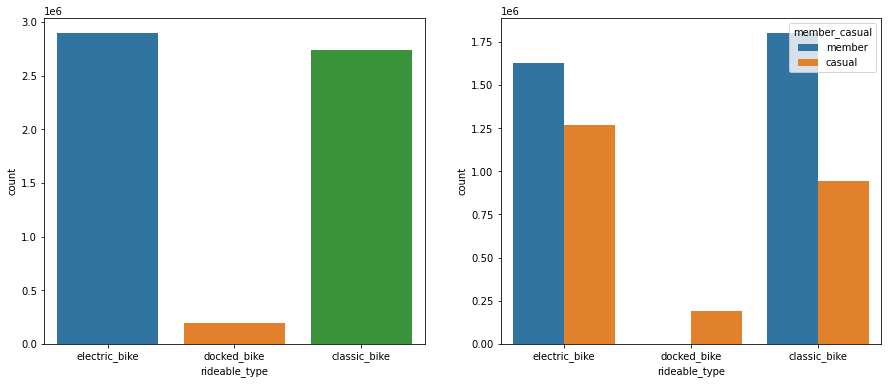

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.countplot(ax=axes[0], x='rideable_type', data=df)
axes[1] = sns.countplot(ax=axes[1], x='rideable_type', data=df, hue='member_casual')
plt.show()

In [19]:
bike_count = df.groupby('rideable_type', as_index=False)['ride_id'].count()
bike_count = bike_count.rename(columns = {'ride_id' : 'ride_count'})
bike_count

,rideable_type,ride_count
0,classic_bike,2740516
1,docked_bike,192475
2,electric_bike,2895244


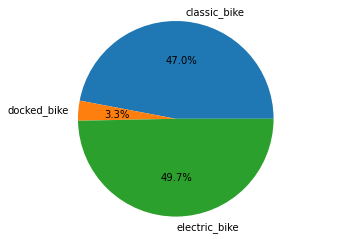

In [20]:
bike_type = ['classic_bike', 'docked_bike', 'electric_bike']
ride_num = bike_count.ride_count

plt.pie(ride_num, labels=bike_type, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

- Electric bike is the most used bike type in all rides, accounting to almost half of all total rides.
- Member riders use classic bike more than electric bike. In the opposite, casual riders use electric bikes more than classic bike.

### Number of rides by membership type

In [21]:
member_count = df.groupby('member_casual', as_index=False)['ride_id'].count()
member_count = member_count.rename(columns = {'ride_id' : 'ride_count'})
member_count

,member_casual,ride_count
0,casual,2401286
1,member,3426949


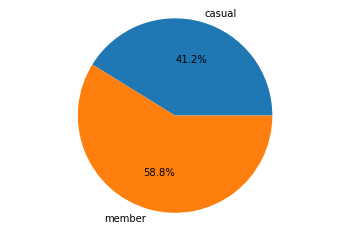

In [22]:
member_type = ['casual', 'member']
ride_num = member_count.ride_count

plt.pie(ride_num, labels=member_type, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

58.8% of riders who used the bike are member riders, while remaining 41.2% are casual riders.

### Analysis of Date Time Column

In our dataset, the `started_at` and `ended_at` columns contains information about the date and time the bike is being used and returned. There are a lot of information we can extract from this column. Using those columns, we will create new columns below:
- Month of the ride
- Season of the ride
- Day of the ride
- Time/hour of the ride
- Ride length (in minutes)

In [23]:
# check present column before new columns are created
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,41.920000,-87.700000,41.94,-87.72,member


In [24]:
# convert `started_at` and `ended_at` columns to datetime data type
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828235 entries, 0 to 5828234
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 400.2+ MB


In [26]:
# create the month column
df['month'] =df['started_at'].dt.month_name()

In [27]:
# create the season column
def find_season(month):
    season_month = {
            'December':'Winter', 'January':'Winter', 'February':'Winter',
            'March':'Spring', 'April':'Spring', 'May':'Spring',
            'June':'Summer', 'July':'Summer', 'August':'Summer',
            'September':'Autumn', 'October':'Autumn', 'November':'Autumn'}
    return season_month.get(month)

season_list = []

for month in df['month']:
    season = find_season(month)
    season_list.append(season)

df['season'] = season_list

In [28]:
# create the day_of_week column
df['day_of_week'] = df['started_at'].dt.day_name()

In [29]:
# create hour time of the ride 
df['time_hour'] = df['started_at'].dt.hour

In [30]:
# create ride duration of the ride
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [31]:
# check statistical summary of ride_duration column
df['ride_duration'].describe()

count    5.828235e+06
mean     1.960198e+01
std      1.698883e+02
min     -1.035335e+04
25%      5.933333e+00
50%      1.048333e+01
75%      1.885000e+01
max      4.070502e+04
Name: ride_duration, dtype: float64

In [32]:
df[df['ride_duration'] < 0].count()

ride_id          108
rideable_type    108
started_at       108
ended_at         108
start_lat        108
start_lng        108
end_lat          108
end_lng          108
member_casual    108
month            108
season           108
day_of_week      108
time_hour        108
ride_duration    108
dtype: int64

After creating the `ride_duration` column, we notice there are duration that is below 0 minutes. As this value doesn't make sense, we will fitler the observation with ride duration above 0 seconds.

In [33]:
df = df[df['ride_duration'] > 0]

After creating several new columns, our dataset now will look like this:

In [34]:
# check present column after new columns are created
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,month,season,day_of_week,time_hour,ride_duration
1361106,5527AAFF8ECCF084,classic_bike,2022-02-25 10:34:07,2022-02-25 10:37:26,41.871737,-87.651030,41.871840,-87.646640,member,February,Winter,Friday,10,3.316667
4018715,6EA09D6DFB4AFD67,classic_bike,2022-07-03 12:46:11,2022-07-03 12:54:46,41.891578,-87.648384,41.909668,-87.648128,casual,July,Summer,Sunday,12,8.583333
5410475,4FFDF5D6F6D33843,electric_bike,2022-09-20 13:14:06,2022-09-20 13:17:00,41.925401,-87.665849,41.925602,-87.653708,casual,September,Autumn,Tuesday,13,2.900000
3897933,95380328FE124462,electric_bike,2022-07-31 14:50:45,2022-07-31 15:03:09,41.890000,-87.650000,41.896747,-87.635668,member,July,Summer,Sunday,14,12.400000
3167195,4DA5E29764F8D8A3,classic_bike,2022-06-11 20:21:57,2022-06-11 20:31:16,41.944540,-87.654678,41.939532,-87.671114,member,June,Summer,Saturday,20,9.316667


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5827664 entries, 0 to 5828234
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   month          object        
 10  season         object        
 11  day_of_week    object        
 12  time_hour      int64         
 13  ride_duration  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 666.9+ MB


Let's continue our analysis.

### Number of rides by month

In [36]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

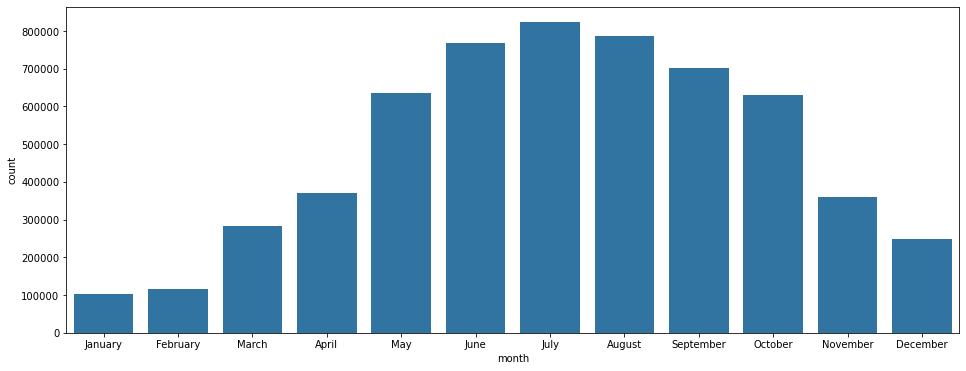

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x='month', data=df, order=month_order, color='tab:blue')
plt.show()

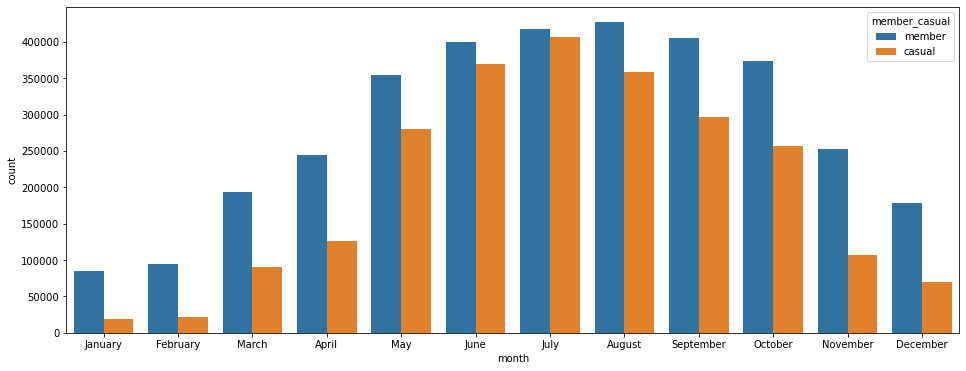

In [38]:
plt.figure(figsize=(16,6))
sns.countplot(x='month', data=df, order=month_order, hue='member_casual')
plt.show()

- Starting from May, the number of rides start to increase and reach its peak at July.
- The highest number of rides occur in June, July, and August. During these months, summer season are taking place.
- The lowest number of rides occur in January, February, and December, the months of winter.
- Number of member riders are always higher than casual riders on all months of the year. In July though, the number of casual rides increase significantly and is almost equal to member riders.

### Number of rides by season

In [39]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

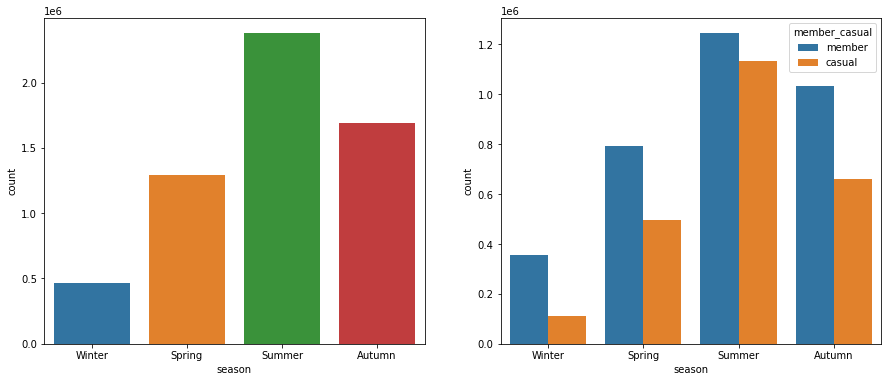

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.countplot(ax=axes[0], x='season', order=season_order, data=df)
axes[1] = sns.countplot(ax=axes[1], x='season', order=season_order, data=df, hue='member_casual')
plt.show()

- Based on season, the number of rides are highest during summer.
- This is most likely contributed by the high increase of casual riders during summer. 

### Number of rides by day of week

In [41]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

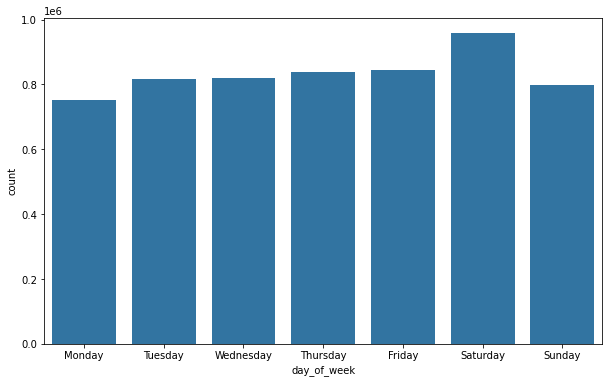

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=day_order, color='tab:blue')
plt.show()

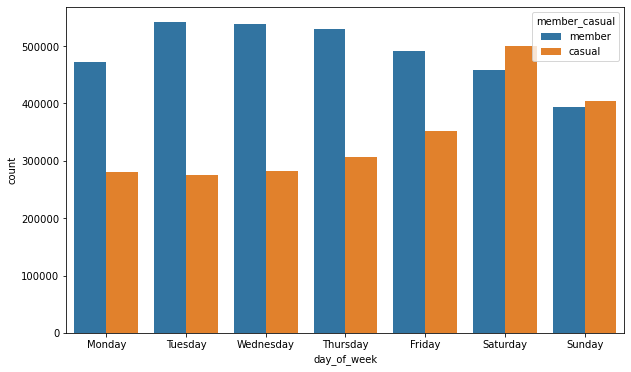

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=day_order, hue='member_casual')
plt.show()

- The number of rides are moderately consistent during weekday. The number of rides increase in Saturday, where it reaches the peak of the week.
- The number of rides by member riders are dominating during weekday. Then the number of rides gradually decrease after Tuesday, and it reaches its lowest on weekend.
- The number of rides by casual riders are quite modest during weekday. However, during weekend the number of rides by casual riders increases quite significant. In the weekend, the number of rides by casual riders are even higher than those of member riders.

### Number of rides by hour of day

In [44]:
hour_ride = df.groupby(['time_hour','member_casual'], as_index=False)['ride_id'].count()
hour_ride = hour_ride.rename(columns={'ride_id': 'ride_count'})
hour_ride

,time_hour,member_casual,ride_count
0,0,casual,48581
1,0,member,36967
2,1,casual,31883
3,1,member,22958
4,2,casual,20256
5,2,member,13242
6,3,casual,11788
7,3,member,8129
8,4,casual,8244
9,4,member,9064


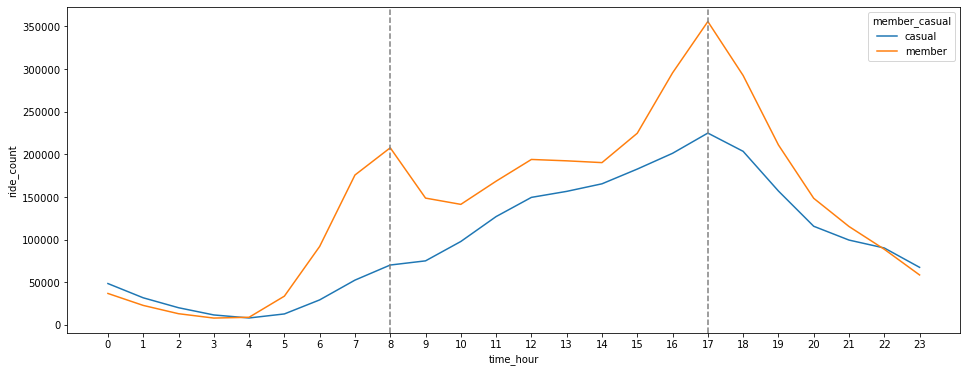

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='time_hour', y='ride_count', hue='member_casual', data=hour_ride)
x = np.arange(0, 24, 1)
plt.xticks(x)
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')
plt.show();

- For member riders, the number of rides reach its peaks during 8.00 at morning and 17.00 at afternoon.
- Since we know that member riders mostly rent the bike during weekday, both 8.00 and 17.00 are expected to be "rush hour", or the time that people commuting to and from work, respectively.
- For casual riders, the number of riders seems increases steadly starting at 5.00, then it reaches its peak at 17.00. 

### Average Ride Duration by Member Type and Day of Week

In [46]:
avg_ride_duration = df.groupby(['member_casual', 'day_of_week'], as_index=False)['ride_duration'].mean()
avg_ride_duration

,member_casual,day_of_week,ride_duration
0,casual,Friday,28.014347
1,casual,Monday,29.730785
2,casual,Saturday,32.712920
3,casual,Sunday,34.367277
4,casual,Thursday,25.682099
5,casual,Tuesday,25.811654
6,casual,Wednesday,25.035897
7,member,Friday,12.529163
8,member,Monday,12.328443
9,member,Saturday,14.264705


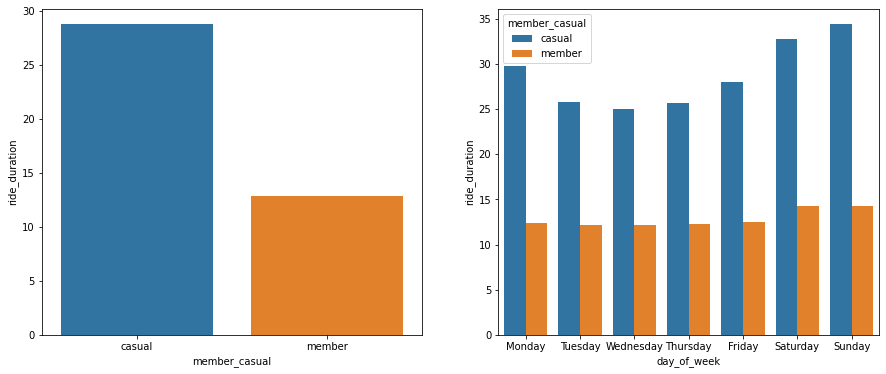

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.barplot(ax=axes[0],
                      x='member_casual', y='ride_duration',
                      data=avg_ride_duration,
                      ci=None)
axes[1] = sns.barplot(ax=axes[1], 
                      x='day_of_week', y='ride_duration',
                      data=avg_ride_duration,
                      ci=None,
                      hue='member_casual',
                      order=day_order)
plt.show()

- Average ride duration by casual riders are higher than member riders. On average, casual riders spent 25 - 35 minutes every day riding their bike. Member riders spent 12 - 15 minutes on average every day.
- The ride duration of member riders are consistent on every day of the week. 
- The ride duration of casual riders are below 30 minutes on weekday, but ride duration rises to 30 - 35 minutes on the weekend.

## Conclusion
---
Through analyzing the dataset, we have come to interesting conclusion:
- Most rides are being used by member riders. 
- Most riders prefer electric bike, and even more popular among casual riders.
- The number of rides reach its peaks during summer (in June, July, and August). This increase is mostly caused by high number of casual rider during summer.
- Member riders mostly rent a bike during weekday, while casual riders are mostly during weekends.
- At 8.00 in the morning and 17.00 in the afternoon is the "rush hour" for member riders. For casual riders, it's more spread out from morning to afternoon, and reach its peak at 17.00 in the afternoon.
- Casual riders spent more time riding a bike. On average, casual riders spent 28 minutes riding the bike each day, while member riders spent 12 minutes each day.
- The riding duration for member riders is stagnant during the week, while for casual members there is a rise in ride duration during weekend.

## Business Recommendation
---
1. Introduce Weekend Pass. The Weekend Pass is targeted to casual riders who mostly rent a bike during weekend. The Weekend Pass will have lower price point than the Annual Pass, but can only be used during Friday, Saturday, and Sunday.

2. Create a reward point campaign; give user reward points which accumulated by riding duration. Since casual riders ride duration is higher than current member riders, they will benefit more from this campaign. Offer them membership discount when they reach certain points to convert them into Cyclistic's member.

3. Perform strategic campaign during summer. Given the number of riders are at its annual peak in summer, we can do strategic campaign and advertising to reach more audience. 

## Future Exploration
---
To get more insights on Cyclistic user behavior, more data could be collected and analyzed. 
- Demographic of users, such as rider occupation and age.
- Include data on whether a casual rider uses a single-ride pass or full-day pass. 

Thank you for visiting my project! 🚴‍♂️🚴‍♂️🚴‍♂️